# Kerndichteschätzung
In der Vorlesung haben Sie Kerndichteschätzer als eine nichtparametrische Methode zum Darstellen einer Verteilung kennen gelernt. Dabei wird eine Verteilung an einem Punkt $x$ wie folgt dargestellt: 
\begin{equation}
p(t) = \frac{1}{n \, h} \sum_{i=1}^n \varphi\left(\frac{t-x_i}{h}\right)
\end{equation}
Hierbei ist $\varphi$ eine Fenster-Funktion, z.B. das Gauß-Fenster
\begin{equation}
\varphi(u) = \frac{1}{\sqrt{2\pi}} e^{-u^2/2}
\end{equation}
## Aufgabe 1
Implementieren Sie die Funktion `kde(t,h,x)`, die für einen Punkt $t$, eine Fenster-Breite $h$ und ein Array von Trainings-Pukten $x$, die Kerndichteschätzung für $p(t)$ berechnet.

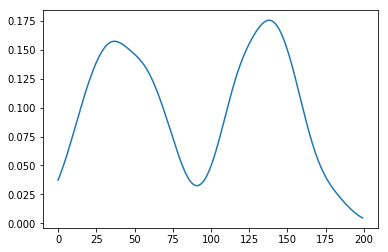

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

def kde(t,h,x):
    n = len(x)
    insum = [k1((t-xj)/h) for xj in x]
    return 1/(n*h) * sum(insum)

def k1(t):
    return 1/math.sqrt(2*math.pi) * math.exp(-1/2 * t**2)

example = np.concatenate((np.random.normal(0,1,100),np.random.normal(5,1,100)))

dens = [kde(t,0.5,example) for t in np.arange(-2,8,0.05)]

plt.plot(dens)

## Aufgabe 2
Implementieren Sie die Funktion `classify_kde(xnew,x,classes)`, die eine Klassifikation mit dem Kerndichteschätzer durchführt. Das bedeutet, es handelt sich um einen Bayes-Klassifikator, bei dem die Likelihood mit dem Kerndichteschätzer geschätzt wird.

In [16]:
import pandas as pd
from scipy.io import arff

def classify_kde(xnew,x,classes):
    uclasses = np.unique(classes)
    def getDens(c):
        xt = x[classes == c]
        return kde(xnew,0.5,xt)
    dens = np.array([getDens(c) for c in uclasses])
    prior = np.array([sum(classes == c)/len(classes) for c in uclasses])
    return uclasses[np.argmax(dens * prior)]

data = arff.loadarff('features1.arff')
df = pd.DataFrame(data[0])
feat = df["AccX_mean"]
cl = df["class"]

p = [classify_kde(x,feat,cl) for x in feat]
np.mean(p == cl)

0.7288135593220338